#### Import libraries and dataset and perform EDA 

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import and read the dataset
telco_df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# View the shape of the dataset
print('Shape:', telco_df.shape)
print('Missing value count:', telco_df.isnull().any().sum())
print('Duplicated entries:', telco_df.duplicated().sum())

Shape: (7043, 21)
Missing value count: 0
Duplicated entries: 0


In [4]:
# Drop unnecessary feature: customerID
telco_df = telco_df.drop(['customerID'], axis=1)

In [5]:
# View the info
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [6]:
# Change total charges to datatype float
telco_df['TotalCharges']=telco_df['TotalCharges'].replace(' ',0).astype(float)

In [7]:
# View statistical summary of the dataset
telco_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
# Bin value count Monthly Charges
telco_df.MonthlyCharges.value_counts(bins=3)

(18.148999999999997, 51.75]    2451
(51.75, 85.25]                 2439
(85.25, 118.75]                2153
Name: MonthlyCharges, dtype: int64

In [9]:
# Bin value count Total charges
telco_df.TotalCharges.value_counts(bins=5)

(-8.686, 1736.96]     3928
(1736.96, 3473.92]    1188
(3473.92, 5210.88]     874
(5210.88, 6947.84]     707
(6947.84, 8684.8]      346
Name: TotalCharges, dtype: int64

<AxesSubplot:ylabel='MonthlyCharges'>

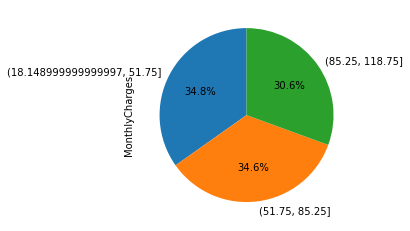

In [10]:
# Customer monthly charges pie chart
telco_df.MonthlyCharges.value_counts(bins=3).plot(kind='pie', autopct='%1.1f%%', startangle=90)

<AxesSubplot:ylabel='TotalCharges'>

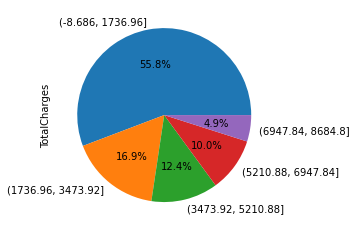

In [11]:
# Customer total charges pie chart
telco_df.TotalCharges.value_counts(bins=5).plot(kind='pie', autopct='%1.1f%%')

<AxesSubplot:ylabel='tenure'>

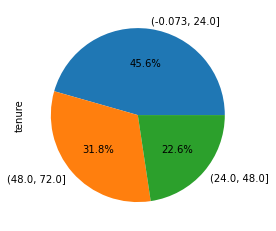

In [12]:
# Customer service tenure pie chart
telco_df.tenure.value_counts(bins=3).plot(kind='pie', autopct='%1.1f%%')

[]

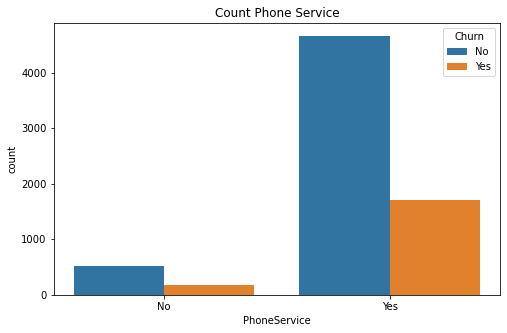

In [13]:
# Customer churn based on phone service 
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot('PhoneService', data=telco_df, hue='Churn')
ax.set_title('Count Phone Service')
plt.plot()

<AxesSubplot:ylabel='Churn'>

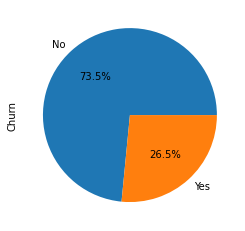

In [14]:
#  Customer churn value counts
telco_df.Churn.value_counts().plot(kind='pie', autopct='%1.1f%%')

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

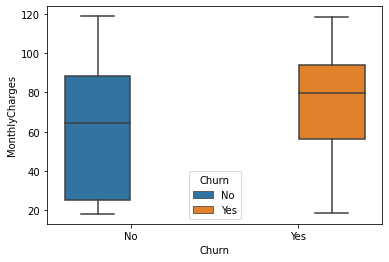

In [15]:
sns.boxplot(data=telco_df, x='Churn', y='MonthlyCharges', hue='Churn')

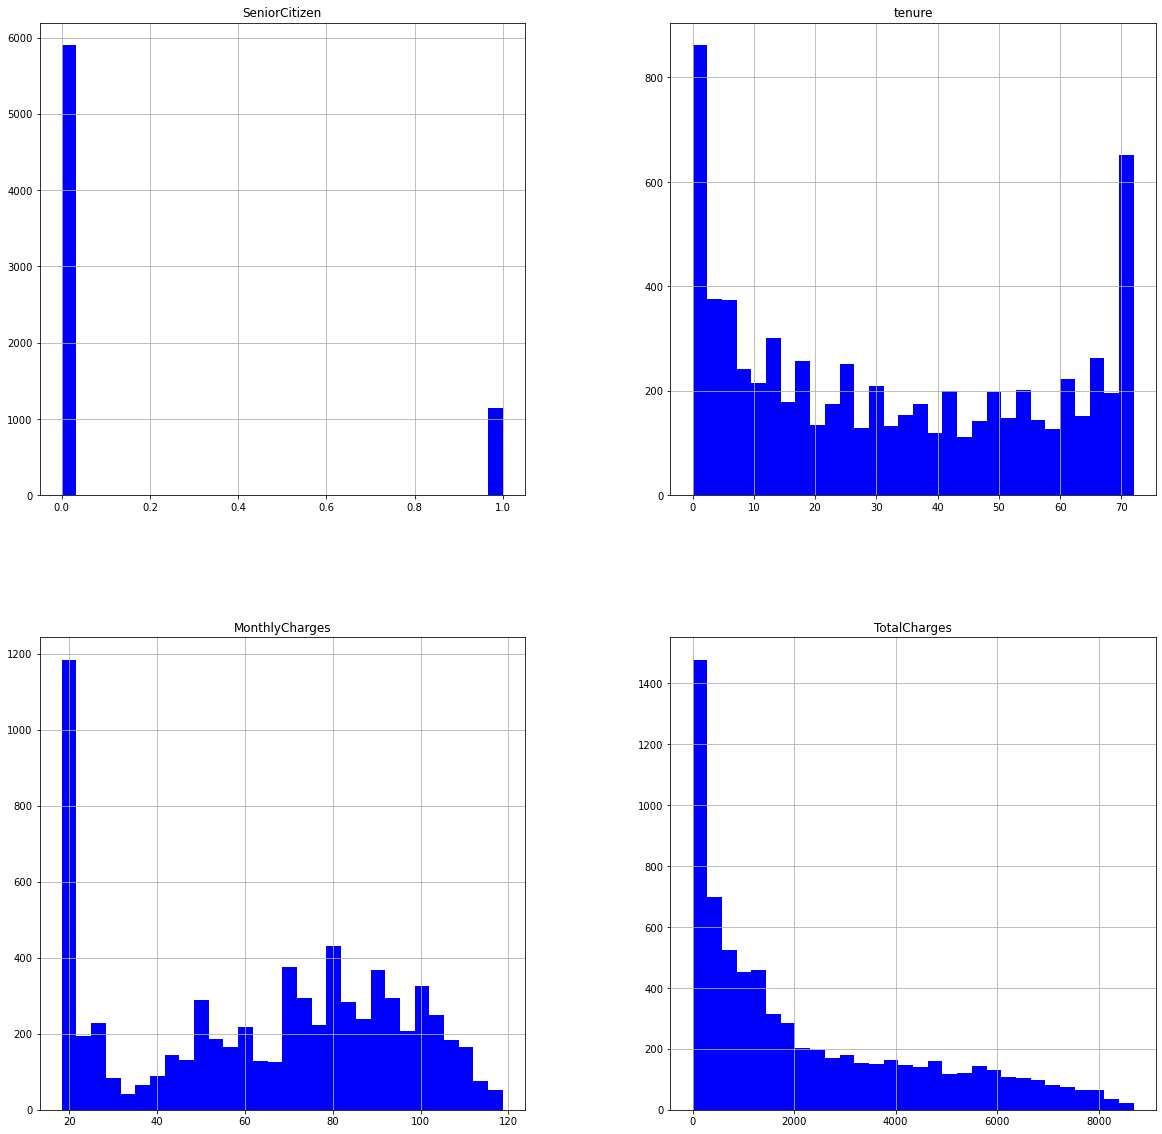

In [16]:
telco_df.hist(bins=30, figsize=(20,20), color='b')
plt.show()

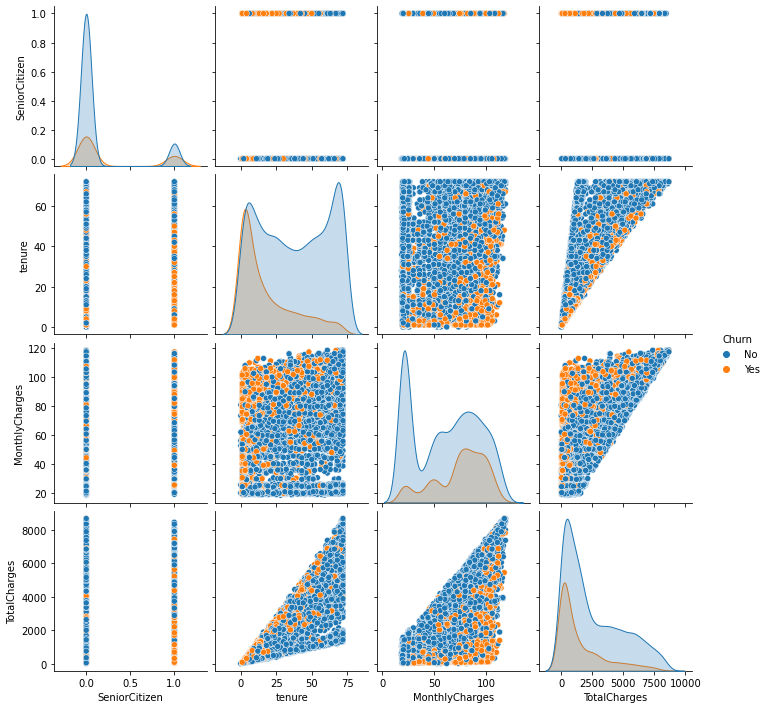

In [17]:
# Plot pairwise relationship in the dataset
sns.pairplot(telco_df, hue='Churn')

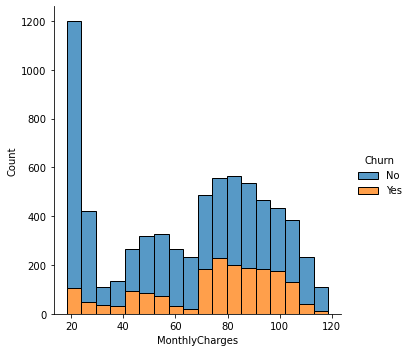

In [18]:
sns.displot(data=telco_df, x='MonthlyCharges', hue='Churn', multiple='stack')

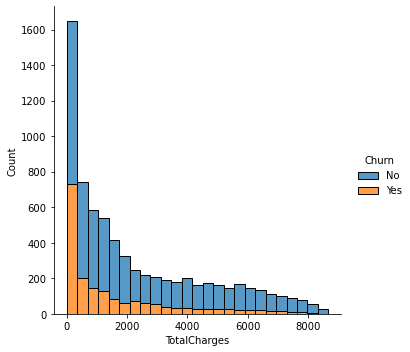

In [19]:
sns.displot(data=telco_df, x='TotalCharges', hue='Churn', multiple='stack')

Text(0.5, 1.0, 'Distribution of tenure(month) by churn')

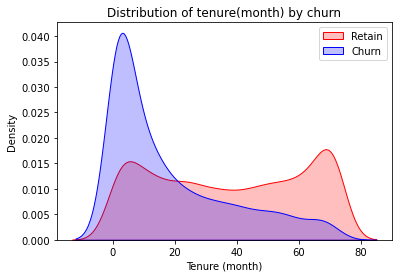

In [20]:
# Churn by tenure
ax = sns.kdeplot(telco_df.tenure[(telco_df['Churn'] == 'No')],
               color = 'Red', shade = True)
ax = sns.kdeplot(telco_df.tenure[(telco_df['Churn'] == 'Yes')],
               color = 'Blue', shade = True)

ax.legend(['Retain', 'Churn'], loc = "upper right")
ax.set_ylabel('Density')
ax.set_xlabel('Tenure (month)')
ax.set_title('Distribution of tenure(month) by churn')

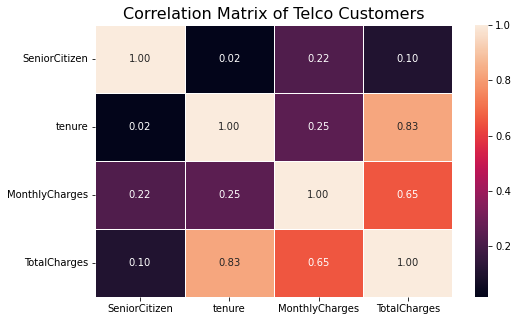

In [21]:
# Correlation Matrix
corr_matrix = telco_df.corr()
plt.figure(figsize = (8, 5))
cm = sns.heatmap(corr_matrix,
               linewidths = 1,
               annot = True, 
               fmt = ".2f")
plt.title('Correlation Matrix of Telco Customers', fontsize = 16)
plt.show()

In [22]:
# Convert 'Churn' into np array
telco_df['Churn'] = np.where(telco_df.Churn == 'Yes',1,0)

In [23]:
telco_df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [24]:
df = pd.get_dummies(telco_df)
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [25]:
df.shape

(7043, 46)

In [26]:
X = df.drop('Churn', axis = 1)
y = df['Churn']

In [27]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.265370,0.495244,0.504756,0.516967,0.483033,0.700412,...,0.387903,0.550192,0.209144,0.240664,0.407781,0.592219,0.219225,0.216101,0.335794,0.228880
std,0.368612,24.559481,30.090047,2266.794470,0.441561,0.500013,0.500013,0.499748,0.499748,0.458110,...,0.487307,0.497510,0.406726,0.427517,0.491457,0.491457,0.413751,0.411613,0.472301,0.420141
min,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
# Perform train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=150)

In [29]:
X_test.shape

(1409, 45)

In [30]:
X_train.shape

(5634, 45)

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

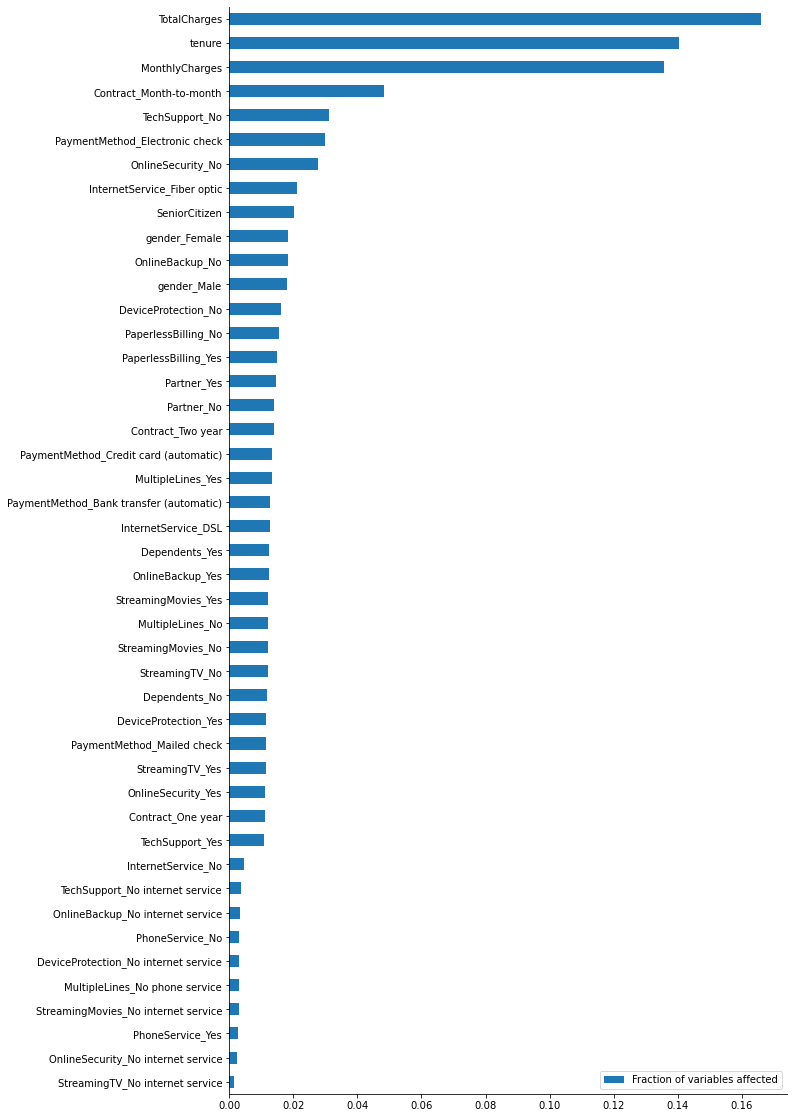

In [32]:
# Plot the feature importance
feat_scores= pd.DataFrame({"Fraction of variables affected" : rf.feature_importances_},index = X.columns)
feat_scores= feat_scores.sort_values(by = "Fraction of variables affected")
feat_scores.plot(kind = "barh", figsize = (10, 20))
sns.despine()

#### XG-Boost Classifier model

In [33]:
import xgboost as xgb

In [34]:
# Instantiate and train the model
model_xgb = xgb.XGBClassifier(learning_rate=0.1, max_depth=20)
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [35]:
# Make prediction
y_predict = model_xgb.predict(X_test)

In [36]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1051
           1       0.60      0.50      0.55       358

    accuracy                           0.79      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



<AxesSubplot:>

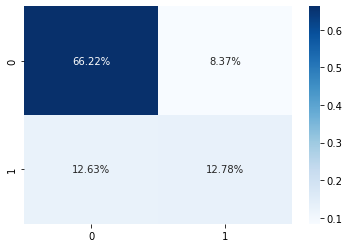

In [37]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

#### Normalize data

In [38]:
# Normalization: feature values range from 0 to 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.43991649, -1.27744458, -1.16032292, ..., -0.52504733,
         1.40641839, -0.54480692],
       [-0.43991649,  0.06632742, -0.25962894, ..., -0.52504733,
        -0.71102597,  1.83551265],
       [-0.43991649, -1.23672422, -0.36266036, ..., -0.52504733,
        -0.71102597,  1.83551265],
       ...,
       [-0.43991649, -0.87024095, -1.1686319 , ..., -0.52504733,
         1.40641839, -0.54480692],
       [ 2.27315869, -1.15528349,  0.32033821, ..., -0.52504733,
        -0.71102597,  1.83551265],
       [-0.43991649,  1.36937906,  1.35896134, ..., -0.52504733,
        -0.71102597, -0.54480692]])

#### Random Forest Classifier Model

In [39]:
# Instantiate and train the model
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

In [40]:
# Make prediction
y_predict = model_rf.predict(X_test)

In [41]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1051
           1       0.63      0.49      0.55       358

    accuracy                           0.80      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.80      0.79      1409



<AxesSubplot:>

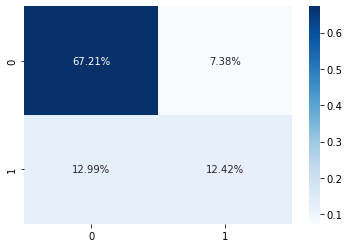

In [42]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

#### Logistic Regression Classifier Model

In [43]:
# Instantiate and train the model
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression(max_iter = 10000)
model_LR.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [44]:
# Generate prediction
y_predict = model_LR.predict(X_test)

In [45]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      1051
           1       0.67      0.59      0.63       358

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



<AxesSubplot:>

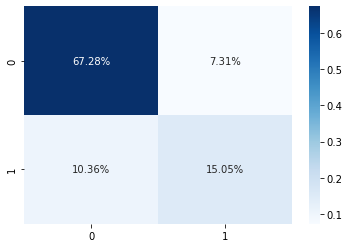

In [46]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

#### Support Vector Machine (SVM) Classifier Model

In [47]:
# Instantiate and train the model
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
model_svc = LinearSVC(max_iter=10000)
model_svc = CalibratedClassifierCV(model_svc)
model_svc.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=LinearSVC(max_iter=10000))

In [48]:
# Generate prediction
y_predict = model_svc.predict(X_test)

In [49]:
# Print classification report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.75      1.00      0.85      1051
           1       1.00      0.00      0.01       358

    accuracy                           0.75      1409
   macro avg       0.87      0.50      0.43      1409
weighted avg       0.81      0.75      0.64      1409



<AxesSubplot:>

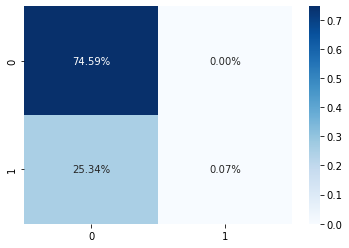

In [50]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

#### K-Nearest Neighbor (KNN) Classifier

In [51]:
# Instantiate and train the model
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [52]:
# Generate prediction
y_predict = model_KNN.predict(X_test)

In [53]:
# Print classification report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1051
           1       0.59      0.46      0.51       358

    accuracy                           0.78      1409
   macro avg       0.71      0.67      0.69      1409
weighted avg       0.77      0.78      0.77      1409



<AxesSubplot:>

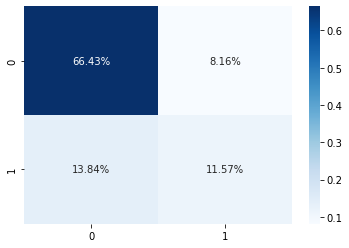

In [54]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

#### Naive Bayes Classifier Model

In [55]:
# Instantiate and train the model
from sklearn.naive_bayes import GaussianNB
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)

GaussianNB()

In [56]:
# Generate predictions
y_predict = model_NB.predict(X_test)

In [57]:
# Print classification report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.93      0.63      0.75      1051
           1       0.44      0.86      0.58       358

    accuracy                           0.69      1409
   macro avg       0.69      0.75      0.67      1409
weighted avg       0.81      0.69      0.71      1409



<AxesSubplot:>

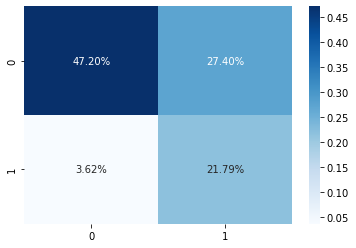

In [58]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

####  AdaBoost Classifier Model

In [59]:
# Instantiate and train the model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

model_ada = AdaBoostClassifier(n_estimators=100, random_state=0)
model_ada.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [60]:
# Generate prediction
y_predict = model_ada.predict(X_test)

In [61]:
# Print classification report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1051
           1       0.67      0.53      0.59       358

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.81      1409



<AxesSubplot:>

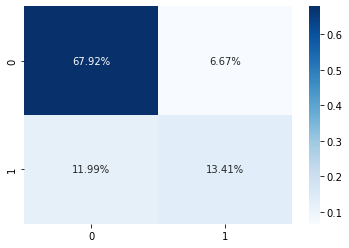

In [62]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

#### Model Evaluation

In [63]:
# ROC curve
from sklearn.metrics import roc_curve

fpr0, tpr0, thresh0 = roc_curve(y_test, model_xgb.predict_proba(X_test)[:, 1], pos_label = 1)
fpr1, tpr1, thresh1 = roc_curve(y_test, model_rf.predict_proba(X_test)[:, 1], pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(y_test, model_LR.predict_proba(X_test)[:, 1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(y_test, model_svc.predict_proba(X_test)[:, 1], pos_label = 1)
fpr4, tpr4, thresh4 = roc_curve(y_test, model_KNN.predict_proba(X_test)[:, 1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, model_NB.predict_proba(X_test)[:, 1], pos_label = 1)
fpr6, tpr6, thresh6 = roc_curve(y_test, model_ada.predict_proba(X_test)[:, 1], pos_label = 1)

In [64]:
print('XG-Boost Accuracy: {}'.format(accuracy_score(y_test, model_xgb.predict(X_test))))
print('Random Forest Accuracy: {}'.format(accuracy_score(y_test, model_rf.predict(X_test))))
print('Logistic Regression Accuracy: {}'.format(accuracy_score(y_test, model_LR.predict(X_test))))
print('Support Vector Machine Accuracy: {}'.format(accuracy_score(y_test, model_svc.predict(X_test))))
print('K-Nearest Neighbors Accuracy: {}'.format(accuracy_score(y_test, model_KNN.predict(X_test))))
print('Naive Bayesian Accuracy: {}'.format(accuracy_score(y_test, model_NB.predict(X_test))))
print('AdaBoost Accuracy: {}'.format(accuracy_score(y_test, model_ada.predict(X_test))))

XG-Boost Accuracy: 0.7899219304471257
Random Forest Accuracy: 0.7963094393186657
Logistic Regression Accuracy: 0.8232789212207239
Support Vector Machine Accuracy: 0.7466288147622427
K-Nearest Neighbors Accuracy: 0.7799858055358411
Naive Bayesian Accuracy: 0.6898509581263307
AdaBoost Accuracy: 0.8133427963094393


In [65]:
from sklearn.metrics import roc_auc_score

auc_score0 = roc_auc_score(y_test, model_xgb.predict_proba(X_test)[:, 1])
auc_score1 = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1])
auc_score2 = roc_auc_score(y_test, model_LR.predict_proba(X_test)[:, 1])
auc_score3 = roc_auc_score(y_test, model_svc.predict_proba(X_test)[:, 1])
auc_score4 = roc_auc_score(y_test, model_KNN.predict_proba(X_test)[:, 1])
auc_score5 = roc_auc_score(y_test, model_NB.predict_proba(X_test)[:, 1])
auc_score6 = roc_auc_score(y_test, model_ada.predict_proba(X_test)[:, 1])


print('ROC AUC Score')
print('XG-Boost: ', auc_score0) 
print('Random Forest: ', auc_score1)
print('Logistic Regression: ', auc_score2) 
print('Support Vector Machine: ', auc_score3) 
print('K-Nearest Neighbors: ', auc_score4) 
print('Naive Bayesian: ', auc_score5)
print('AdaBoost: ', auc_score6)

ROC AUC Score
XG-Boost:  0.8284926832120514
Random Forest:  0.8425508560615322
Logistic Regression:  0.8609411627128194
Support Vector Machine:  0.8561173450132622
K-Nearest Neighbors:  0.7591944888879439
Naive Bayesian:  0.8335556984834874
AdaBoost:  0.8583206204253464


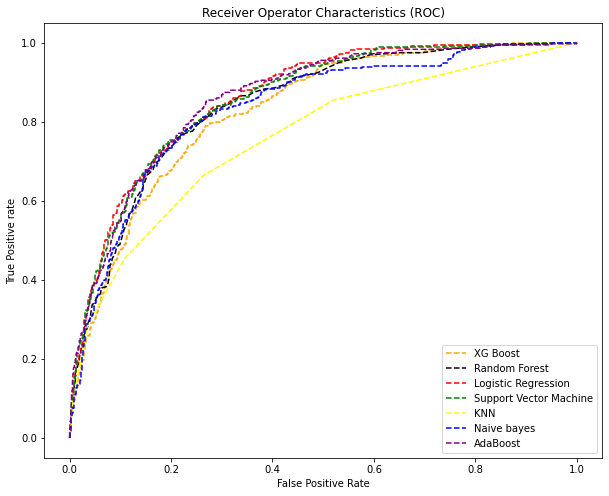

In [66]:
plt.figure(figsize=(10,8))
plt.plot(fpr0, tpr0, linestyle = '--', color = 'orange', label = 'XG Boost')
plt.plot(fpr1, tpr1, linestyle = '--', color = 'black', label = 'Random Forest')
plt.plot(fpr2, tpr2, linestyle = '--', color = 'red', label = 'Logistic Regression')
plt.plot(fpr3, tpr3, linestyle = '--', color = 'green', label = 'Support Vector Machine')
plt.plot(fpr4, tpr4, linestyle = '--', color = 'yellow', label = 'KNN')
plt.plot(fpr5, tpr5, linestyle = '--', color = 'blue', label = 'Naive bayes')
plt.plot(fpr6, tpr6, linestyle = '--', color = 'purple', label = 'AdaBoost')

plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()

The best trained model tested in this project is Logistic Regression Classifier Model. Testing with other ML classification models may generate better predictions. Tuning some parameters on the models may potentially result in better predictions.